# Import The Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('Modules Loaded')

Modules Loaded


# Loading Dataset & Data Overview

In [2]:
df = pd.read_csv("SMS_Spam_Collection.csv", sep='\t')
df.head(10)

,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,ham,"Nah I don't think he goes to usf, he lives aro..."
2,ham,Even my brother is not like to speak with me. ...
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnamin...
5,spam,WINNER!! As a valued network customer you have...
6,spam,Had your mobile 11 months or more? U R entitle...
7,ham,I'm gonna be home soon and i don't want to tal...
8,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
9,spam,URGENT! You have won a 1 week FREE membership ...


In [3]:
df = pd.read_csv("SMS_Spam_Collection.csv", sep='\t', header =None)
df.columns=['labels','body text']
df.head(10)


,labels,body text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
5,ham,As per your request 'Melle Melle (Oru Minnamin...
6,spam,WINNER!! As a valued network customer you have...
7,spam,Had your mobile 11 months or more? U R entitle...
8,ham,I'm gonna be home soon and i don't want to tal...
9,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [4]:
df.rename(columns = { 'body text':'message'}, inplace=True)
df.head()

,labels,message
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


# Data Describe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5568 entries, 0 to 5567
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   labels   5568 non-null   object
 1   message  5568 non-null   object
dtypes: object(2)
memory usage: 87.1+ KB


In [6]:
df.isnull().sum().sort_values(ascending=False)

labels     0
message    0
dtype: int64

In [7]:
df.labels.value_counts()

labels
ham     4822
spam     746
Name: count, dtype: int64

In [8]:
df.shape

(5568, 2)

In [9]:
df.drop_duplicates(inplace=True)
df.shape

(5165, 2)

In [10]:
df['label'] = df['labels'].map({'ham': 0, 'spam': 1})
df.head()

,labels,message,label
0,ham,I've been searching for the right words to tha...,0
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
2,ham,"Nah I don't think he goes to usf, he lives aro...",0
3,ham,Even my brother is not like to speak with me. ...,0
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,0


In [11]:
df.drop(['labels'], axis=1, inplace=True)
df.head()

,message,label
0,I've been searching for the right words to tha...,0
1,Free entry in 2 a wkly comp to win FA Cup fina...,1
2,"Nah I don't think he goes to usf, he lives aro...",0
3,Even my brother is not like to speak with me. ...,0
4,I HAVE A DATE ON SUNDAY WITH WILL!!,0


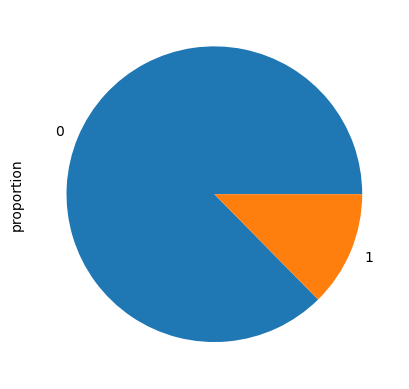

In [12]:
df.label.value_counts(normalize=True).plot.pie()
plt.show()

#  Pre-Processing Text Data

## Remove Punctuation 
## Converting Text To Lower Case


In [13]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
#list comprhansion 
#lambda function
#adding join to join chars into words 

def remove_punct(text):
    
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

df['message_nopunc'] = df['message'].apply(lambda x: remove_punct(x.lower()))

df.head(10)

,message,label,message_nopunc
0,I've been searching for the right words to tha...,0,ive been searching for the right words to than...
1,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry in 2 a wkly comp to win fa cup fina...
2,"Nah I don't think he goes to usf, he lives aro...",0,nah i dont think he goes to usf he lives aroun...
3,Even my brother is not like to speak with me. ...,0,even my brother is not like to speak with me t...
4,I HAVE A DATE ON SUNDAY WITH WILL!!,0,i have a date on sunday with will
5,As per your request 'Melle Melle (Oru Minnamin...,0,as per your request melle melle oru minnaminun...
6,WINNER!! As a valued network customer you have...,1,winner as a valued network customer you have b...
7,Had your mobile 11 months or more? U R entitle...,1,had your mobile 11 months or more u r entitled...
8,I'm gonna be home soon and i don't want to tal...,0,im gonna be home soon and i dont want to talk ...
9,"SIX chances to win CASH! From 100 to 20,000 po...",1,six chances to win cash from 100 to 20000 poun...


# Tokenization

In [15]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
def tokenize(text):
    tokens = word_tokenize(text)
    return tokens
df['message_tokenized'] = df['message_nopunc'].apply(lambda x: tokenize(x))

df.head()

,message,label,message_nopunc,message_tokenized
0,I've been searching for the right words to tha...,0,ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,..."
1,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
2,"Nah I don't think he goes to usf, he lives aro...",0,nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."
3,Even my brother is not like to speak with me. ...,0,even my brother is not like to speak with me t...,"[even, my, brother, is, not, like, to, speak, ..."
4,I HAVE A DATE ON SUNDAY WITH WILL!!,0,i have a date on sunday with will,"[i, have, a, date, on, sunday, with, will]"


# Remove Stop_Words

In [17]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
stopwords_En = nltk.corpus.stopwords.words('english')
stopwords_En

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords_En]
    return text

df['message_nostop'] = df['message_tokenized'].apply(lambda x: remove_stopwords(x))

df.head()

,message,label,message_nopunc,message_tokenized,message_nostop
0,I've been searching for the right words to tha...,0,ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather..."
1,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,"Nah I don't think he goes to usf, he lives aro...",0,nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."
3,Even my brother is not like to speak with me. ...,0,even my brother is not like to speak with me t...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids..."
4,I HAVE A DATE ON SUNDAY WITH WILL!!,0,i have a date on sunday with will,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


# Stemming

In [20]:
import nltk
ps = nltk.PorterStemmer()

In [21]:
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

df['message_stemmed'] = df['message_nostop'].apply(lambda x: stemming(x))

df.head()

,message,label,message_nopunc,message_tokenized,message_nostop,message_stemmed
0,I've been searching for the right words to tha...,0,ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr..."
1,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
2,"Nah I don't think he goes to usf, he lives aro...",0,nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."
3,Even my brother is not like to speak with me. ...,0,even my brother is not like to speak with me t...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,..."
4,I HAVE A DATE ON SUNDAY WITH WILL!!,0,i have a date on sunday with will,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]"


## Create function to remove punctuation, tokenize, remove stopwords, and stemming


In [22]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
     #tokens = re.split('\W+', text)
    tokens = word_tokenize(text)
    text = " ".join([ps.stem(word) for word in tokens if word not in stopwords_En])
    return text
df=df[['label','message']]
df['clean_message'] = df['message'].apply(lambda x: clean_text(x))

In [23]:
df

,label,message,clean_message
0,0,I've been searching for the right words to tha...,ive search right word thank breather promis wo...
1,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
2,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though
3,0,Even my brother is not like to speak with me. ...,even brother like speak treat like aid patent
4,0,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday
...,...,...,...
5563,1,This is the 2nd time we have tried 2 contact u...,2nd time tri 2 contact u u £750 pound prize 2 ...
5564,0,Will ü b going to esplanade fr home?,ü b go esplanad fr home
5565,0,"Pity, * was in mood for that. So...any other s...",piti mood soani suggest
5566,0,The guy did some bitching but I acted like i'd...,guy bitch act like id interest buy someth els ...


# Vectorizing Text Data
## Count Vectorization

In [24]:
from wordcloud import WordCloud

spam_words = ' '.join(list(df[df['label'] == 1]['message']))


In [25]:
from wordcloud import WordCloud

ham_words = ' '.join(list(df[df['label'] == 0]['message']))

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
x = df['message']
y = df['label']
cv = CountVectorizer()
x= cv.fit_transform(x)

# Split Training and Testing Data Sets

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

# Training Random Forest Model On The Training Set

In [28]:
from sklearn.ensemble import RandomForestClassifier as rf

In [29]:
classifier = rf(n_estimators = 5 ,criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)
print('training evaluation', classifier.score(x_train, y_train))
print('testing evaluation ', classifier.score(x_test, y_test))

training evaluation 0.9966118102613747
testing evaluation  0.9699903194578896


# Predicting the Test set results

In [30]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

# Making The Confusion Matrix

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[903   1]
 [ 30  99]]


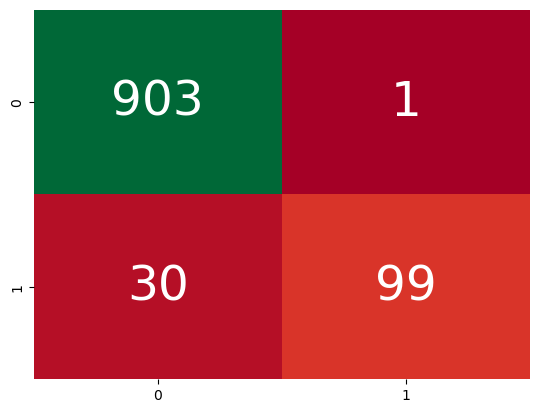

In [32]:
sns.heatmap(confusion_matrix, annot=True,cbar=False,fmt="d",cmap="RdYlGn",annot_kws={"size": 35})
plt.show()

In [33]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

print('Number of test SMSs : ', TP+TN+FP+FN)
print('Number of actual SPAM SMSs : ', TP+FN)
print('Number of actual HAM SMSs: : ', TN+FP)
print('Number of predected SMSs as SPAM: ', TP+FP)
print('Number of predected SMSs as HAM : ', FN+TN)

Number of test SMSs :  1033
Number of actual SPAM SMSs :  129
Number of actual HAM SMSs: :  904
Number of predected SMSs as SPAM:  100
Number of predected SMSs as HAM :  933


In [34]:
print("Accuracy =", accuracy_score(y_test, y_pred))

Accuracy = 0.9699903194578896


In [35]:
print("precision =", precision_score(y_test, y_pred))

precision = 0.99


In [36]:
print("recall =", recall_score(y_test, y_pred))

recall = 0.7674418604651163


In [37]:
print("f1-score =", f1_score(y_test, y_pred))

f1-score = 0.8646288209606987


# Graphic User Interface (GUI)

In [38]:
from tkinter import *

In [39]:
def sms():
    
    # creating a list of labels
    lab = ['not spam','spam'] 
    
    # perform tokenization
    x = cv.transform([e.get()]).toarray()
    
    # predict the text
    p = classifier.predict(x)
    
    # convert the words in string with the help of list
    s = [str(i) for i in p]
    a = int("".join(s))
    
    # show out the final result
    res = str("This message is looking: "+ lab[a])
    if lab[a]=='spam':

        classification = Label(root, text=res, font=('helvetica', 15 , 'bold'), fg="red")
        classification.pack()
    else:
        classification = Label(root, text=res, font=('helvetica', 15, 'bold'), fg="green")
        classification.pack()




root = Tk()
root.title('SpellCheck')
root.geometry('400x400')

head = Label(root, text='SPAM  Checker',font=('helvetica', 24 , 'bold'))
head.pack()
e = Entry(root, width=400,borderwidth=5)
e.pack()
b = Button(root, text = 'Check', font=('helvetica', 20 , 'bold'), fg = 'white', bg = 'green', command = sms)
b.pack()
root.mainloop()